
### demonstration of k-means clustering with iris dataset

/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x71a8c3d97d90>
Traceback (most r

Text(0.5, 1.0, 'Original Data')

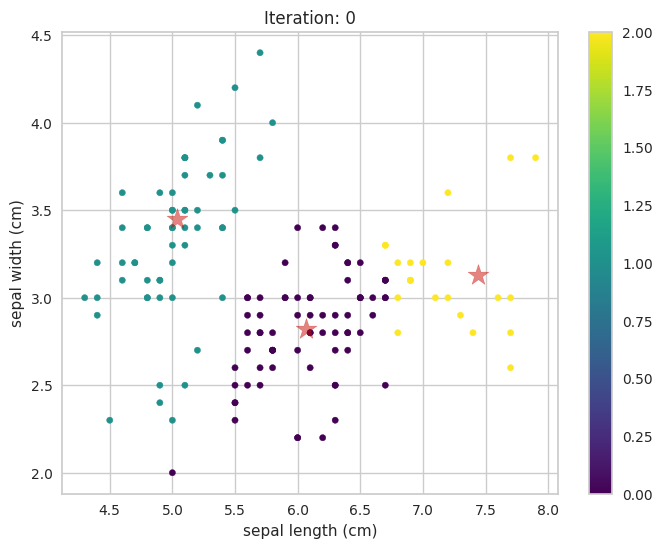

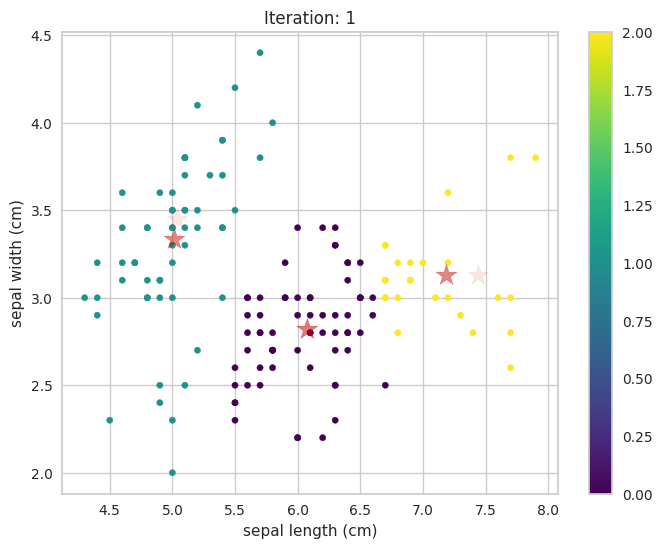

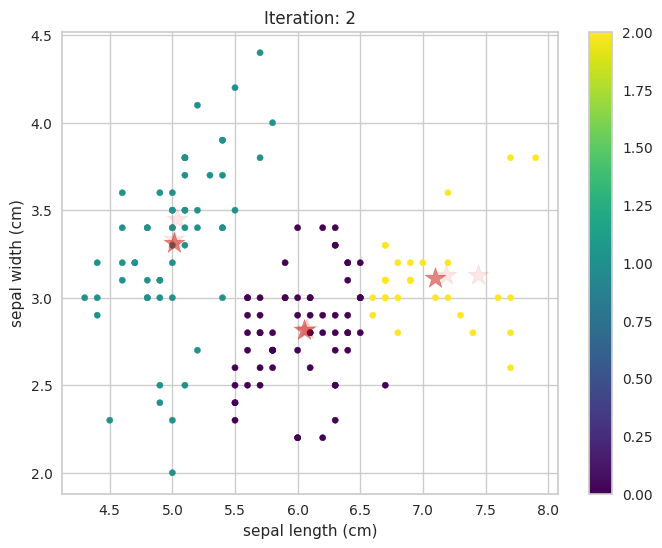

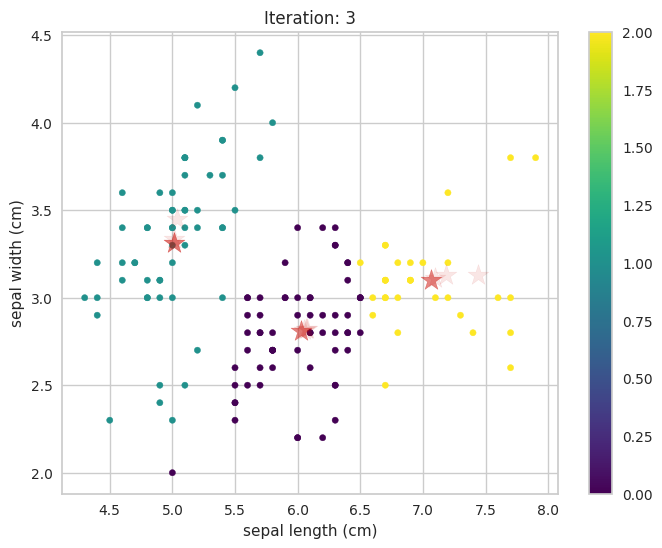

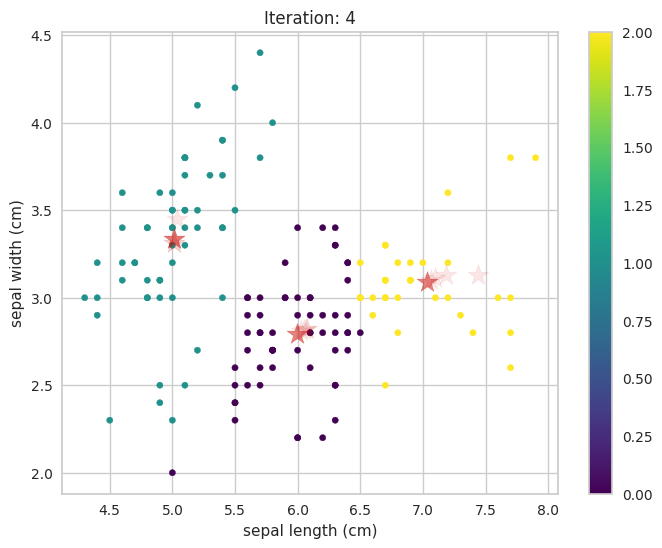

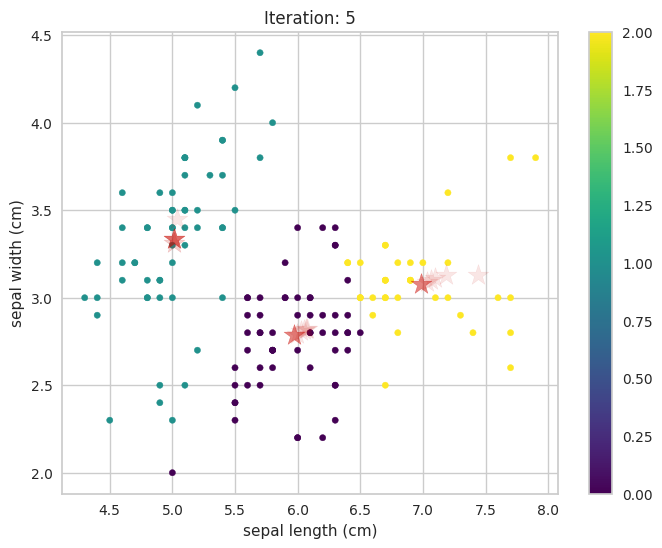

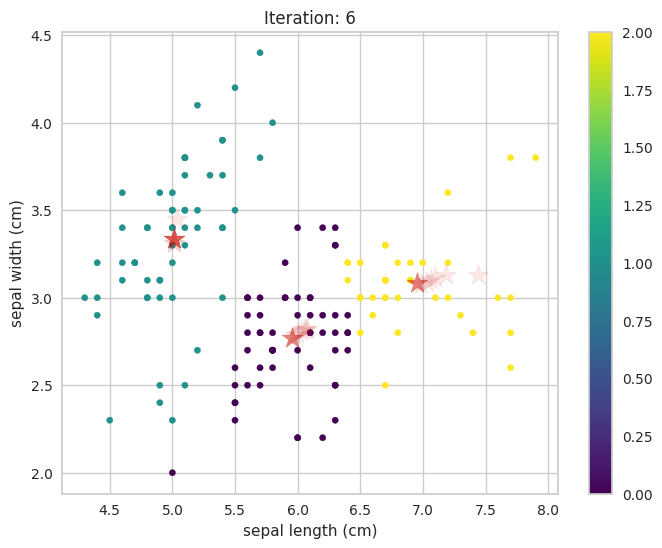

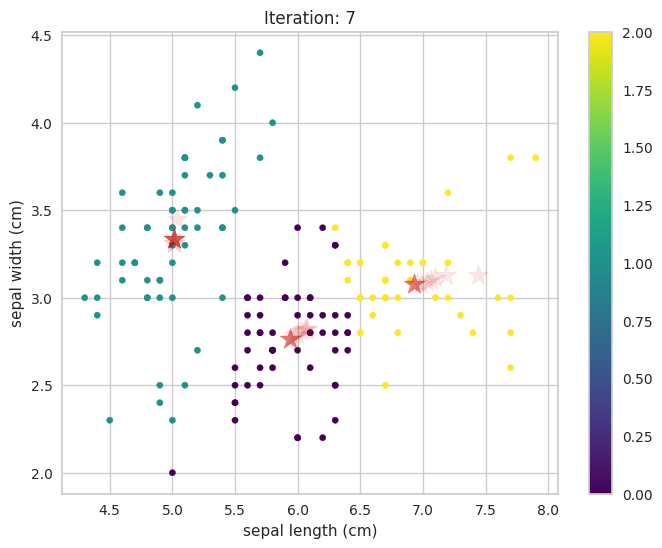

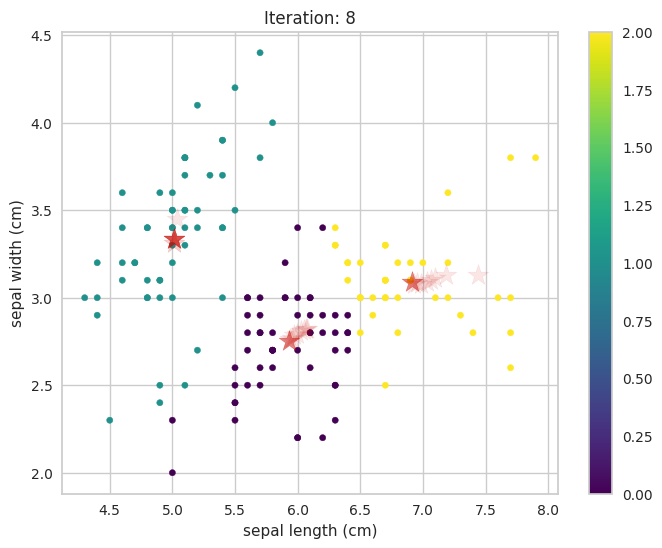

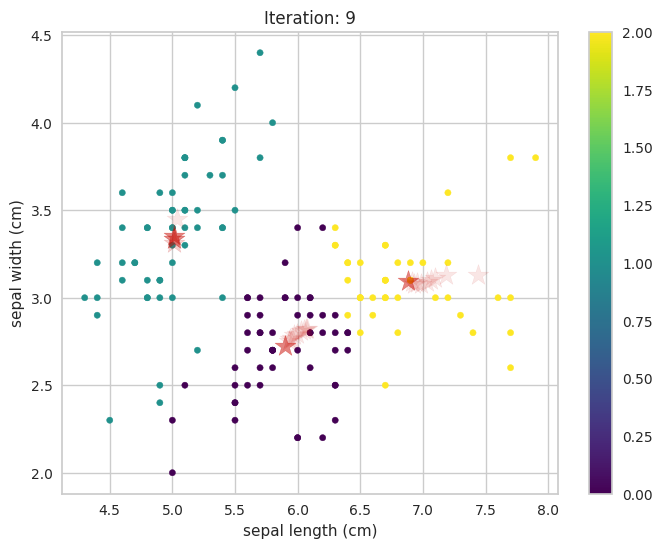

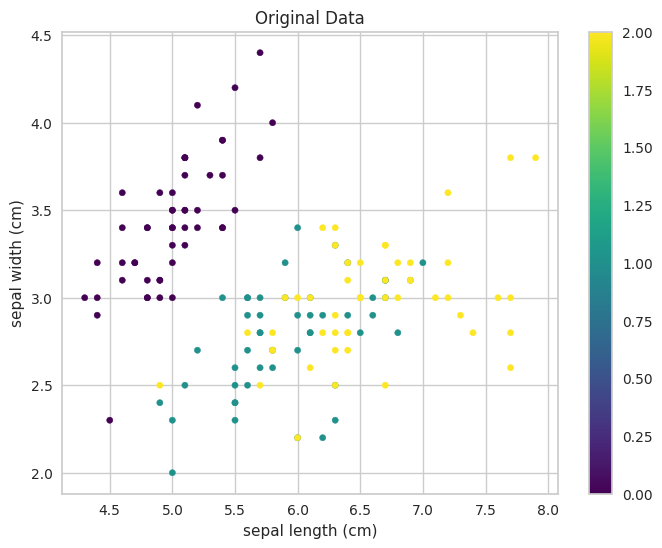

In [11]:
from sklearn.cluster import KMeans
import sklearn.datasets
import matplotlib.pyplot as plt

dataset = sklearn.datasets.load_iris(as_frame=True)

X = (dataset
     ['data']
     .loc[:, ['sepal length (cm)', 'sepal width (cm)']]
)
y = dataset['target']

# keep list of all centroids
centroids = []


for i in range(10):
    model = KMeans(n_clusters=3, init='random', n_init=1,
                    max_iter=i+1, random_state=42)
    model.fit(X)
    label = model.predict(X)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    X.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c=label, cmap='viridis', ax=ax)
    
    centers = model.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], marker='*', s=250, color='r', alpha=.5)
    ax.set_title('Iteration: ' + str(i))

    if i > 0:
        for centroid in centroids:
            ax.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=250, color='r', alpha=.1)
    
    centroids.append(model.cluster_centers_)
    
  
fig, ax = plt.subplots(figsize=(8, 6))
X.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c=y, cmap='viridis', ax=ax)
ax.set_title('Original Data')


### K Evaluation for K-means


## Elbow method 
Track the "inertia" of the model as the K value increases. The inertia is the sum of squared distances of samples to their closest cluster center.

/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x71a8d3bdaef0>
Traceback (most r

/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x71a8d3bdaef0>
Traceback (most r

Text(0.5, 1.0, 'Elbow Method')

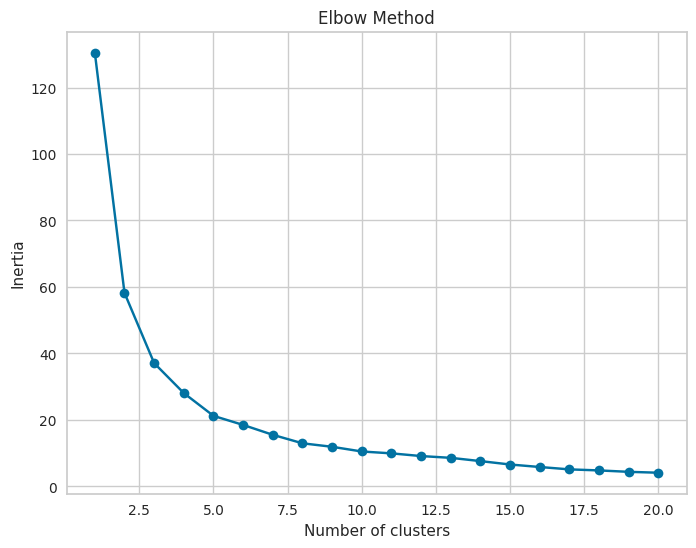

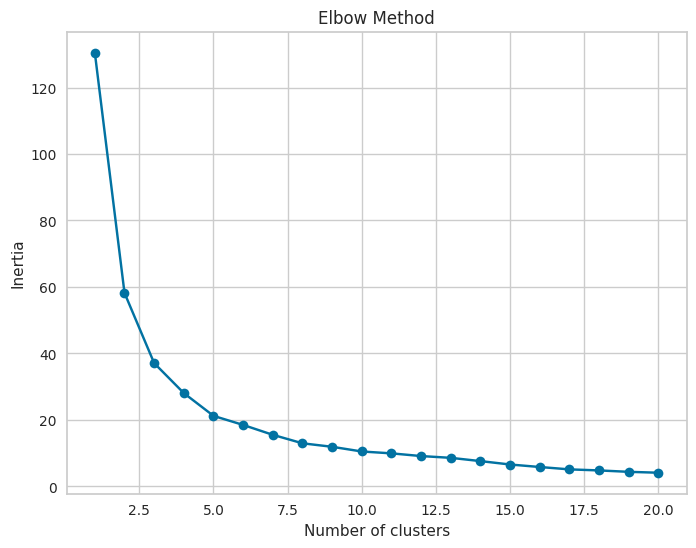

In [12]:
# Running  elbow method to find optimal number of clusters

inertias = []
max_clusters = 20
for i in range(max_clusters):
    km = KMeans(n_clusters=i+1, n_init='auto',
                max_iter=300, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

# plot the results# Running  elbow method to find optimal number of clusters

inertias = []
max_clusters = 20
for i in range(max_clusters):
    km = KMeans(n_clusters=i+1, n_init='auto',
                max_iter=300, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

# plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, max_clusters+1), inertias, marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
ax.set_title('Elbow Method')
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, max_clusters+1), inertias, marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
ax.set_title('Elbow Method')


## Silhouette coefficient 
***The silhouette coefficient is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette coefficient ranges from -1 to 1.***

In [13]:
!pip install yellowbrick

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer
SilhouetteVisualizer?

Init signature:
SilhouetteVisualizer(
    estimator,
    ax=None,
    colors=None,
    is_fitted='auto',
    **kwargs,
)
Docstring:     
The Silhouette Visualizer displays the silhouette coefficient for each
sample on a per-cluster basis, visually evaluating the density and
separation between clusters. The score is calculated by averaging the
silhouette coefficient for each sample, computed as the difference
between the average intra-cluster distance and the mean nearest-cluster
distance for each sample, normalized by the maximum value. This produces a
score between -1 and +1, where scores near +1 indicate high separation
and scores near -1 indicate that the samples may have been assigned to
the wrong cluster.

In SilhouetteVisualizer plots, clusters with higher scores have wider
silhouettes, but clusters that are less cohesive will fall short of the
average score across all clusters, which is plotted as a vertical dotted
red line.

This is particularly useful for determining cluster i

In [15]:

import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/fonts/truetype/tlwg/Laksaman-BoldItalic.ttf',
 '/usr/share/fonts/opentype/urw-base35/P052-Bold.otf',
 '/usr/share/fonts/truetype/fonts-gujr-extra/padmaa-Medium-0.5.ttf',
 '/usr/share/fonts/truetype/lohit-bengali/Lohit-Bengali.ttf',
 '/usr/share/fonts/truetype/lato/Lato-Bold.ttf',
 '/usr/share/fonts/truetype/kacst/KacstDigital.ttf',
 '/usr/share/fonts/truetype/malayalam/Dyuthi-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/fonts-deva-extra/kalimati.ttf',
 '/usr/share/fonts/truetype/lyx/cmsy10.ttf',
 '/usr/share/fonts/truetype/ubuntu/UbuntuMono-BI.ttf',
 '/usr/share/fonts/truetype/lohit-tamil/Lohit-Tamil.ttf',
 '/usr/share/fonts/opentype/malayalam/Gayathri-Regular.otf',
 '/usr/share/fonts/truetype/padauk/PadaukBook-Regular.ttf',
 '/usr/share/fonts/truetype/lyx/stmary10.ttf',
 '/usr/share/fonts/opentype/urw-base35/C059-Bold.otf',
 '/usr/share/fonts/truetype/fonts-telu-extra/vemana2000.ttf',
 '/usr/share/fonts/

In [16]:
# if on linux, set matplotlib font to DejaVuSans
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mukesh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x71a8bf745a20>
Traceback (most r

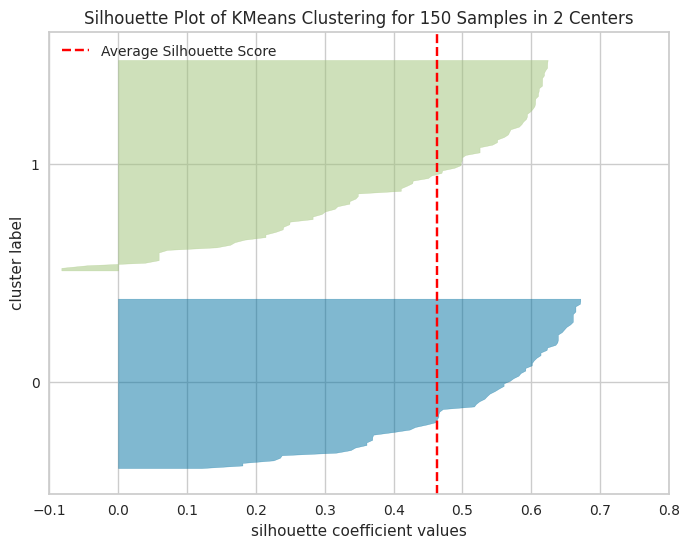

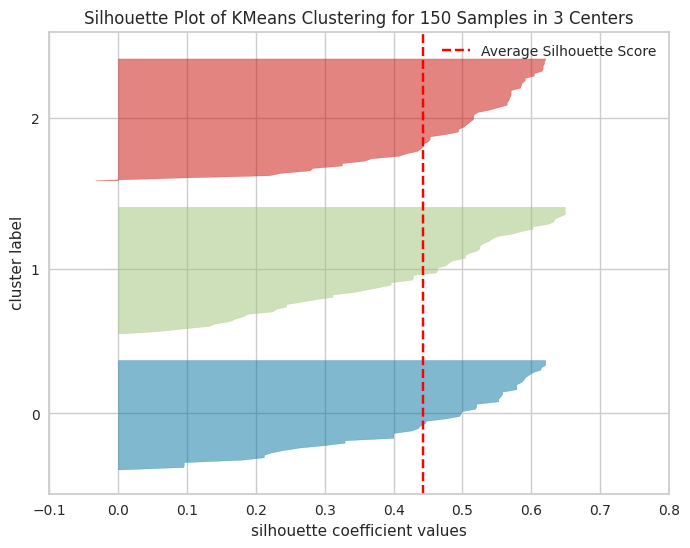

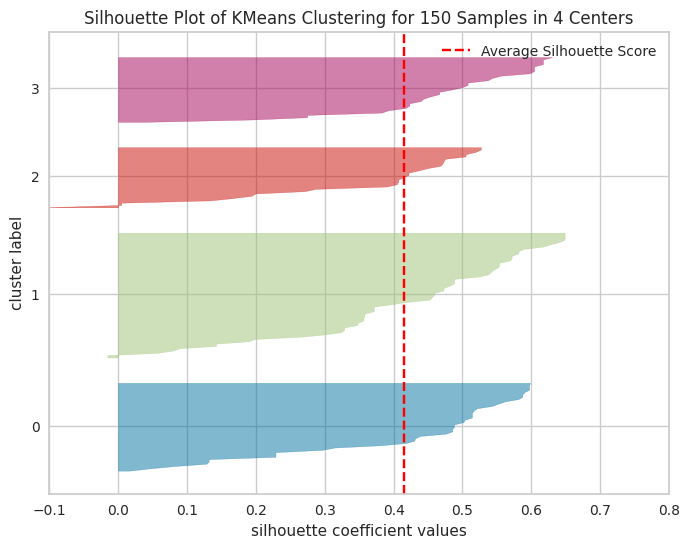

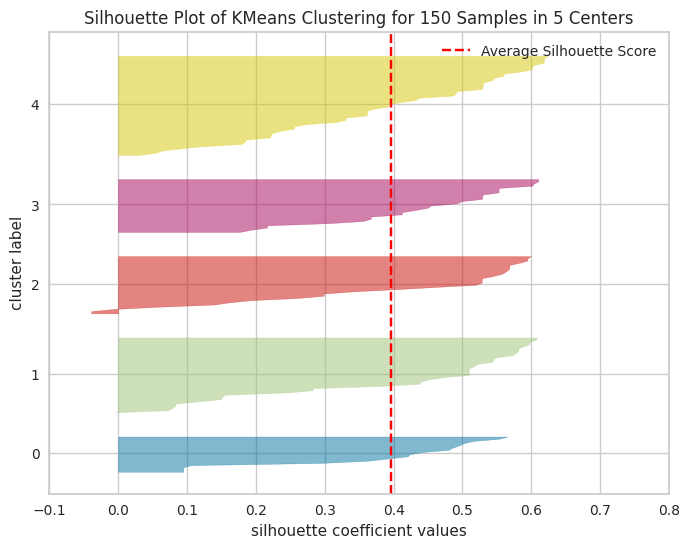

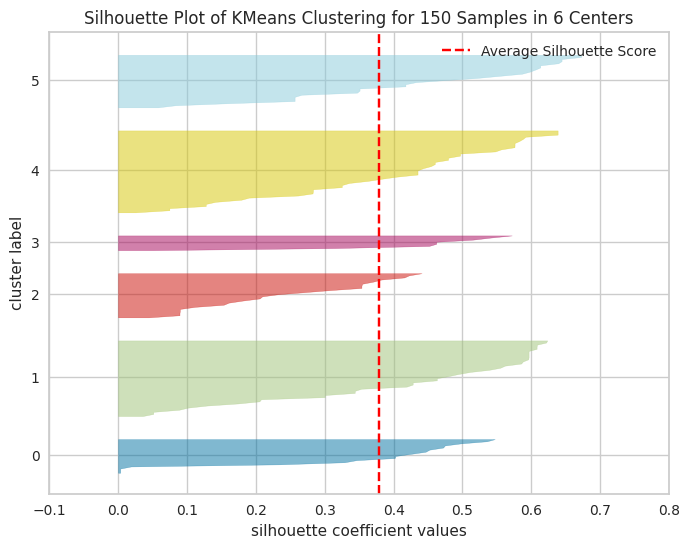

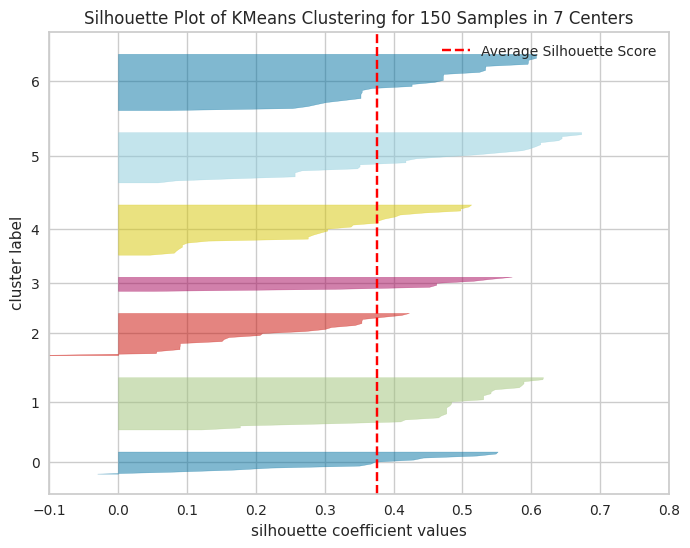

In [17]:
# Run silhouette method to find optimal number of clusters
from yellowbrick.cluster import silhouette_visualizer 

max_clusters = 6
for i in range(max_clusters):
    km = KMeans(n_clusters=i+2, n_init='auto',
                max_iter=300, random_state=42)

    fig, ax = plt.subplots(figsize=(8, 6))
    # setting show=False so we can set xlim to same value for all plots
    viz = silhouette_visualizer(km, X, colors='yellowbrick', ax=ax, show=False)
    ax.set_xlim([-0.1, .8])    

